In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway

In [2]:
dengue = pd.read_csv('dataset\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> Checking Data Type

In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> Checking For Null Values

In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1> Changing Data Types

In [6]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1> Checking The Values Of Year

In [8]:
dengue['Year'].value_counts()

Year
2016    204
2017    204
2018    204
2019    204
2020    204
Name: count, dtype: int64

<h1>  Creating A New Dataframe For Each Year

In [9]:
dengue_2016 = dengue[dengue['Year'] == 2016]
dengue_2017 = dengue[dengue['Year'] == 2017]
dengue_2018 = dengue[dengue['Year'] == 2018]
dengue_2019 = dengue[dengue['Year'] == 2019]
dengue_2020 = dengue[dengue['Year'] == 2020]

<hr style="border: 3px solid green; width: 80%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> Insights

<h1> General Trends Over the Years

<h2> 1. What is the total number of dengue cases and deaths per year?

In [10]:
yearly_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()
yearly_data

,Dengue_Cases,Dengue_Deaths
Year,,
2016,209544,8127
2017,154155,4563
2018,250783,1226
2019,441902,1733
2020,91041,1195


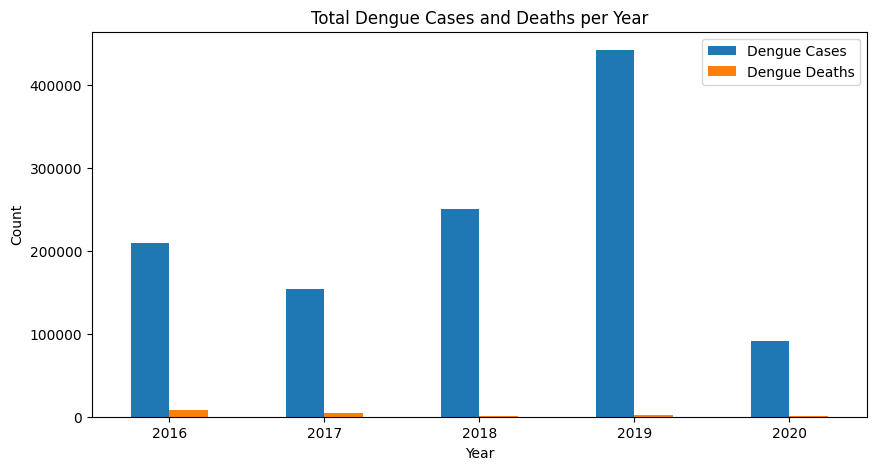

In [11]:
yearly_data.plot(kind="bar", figsize=(10, 5))
plt.title("Total Dengue Cases and Deaths per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(["Dengue Cases", "Dengue Deaths"])
plt.show()

<h2> Insight 1 </h2>

<h3> From 2016 to 2019, dengue cases increased significantly, peaking in 2019 with over 450,000 cases. However, in 2020, there was a sharp decline in reported cases. <br> <br> Dengue deaths followed a similar trend but remained relatively low compared to the number of cases. The slight variations in deaths suggest that while the number of infections surged, the fatality rate did not drastically increase, possibly due to improved healthcare responses. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 2. How has the number of dengue cases changed from year to year?

In [12]:
# Calculate year-over-year growth rate of cases
yearly_data["Cases_Growth_Rate"] = yearly_data["Dengue_Cases"].pct_change() * 100
yearly_data

,Dengue_Cases,Dengue_Deaths,Cases_Growth_Rate
Year,,,
2016,209544,8127,NaN
2017,154155,4563,-26.433112
2018,250783,1226,62.682365
2019,441902,1733,76.208914
2020,91041,1195,-79.397921


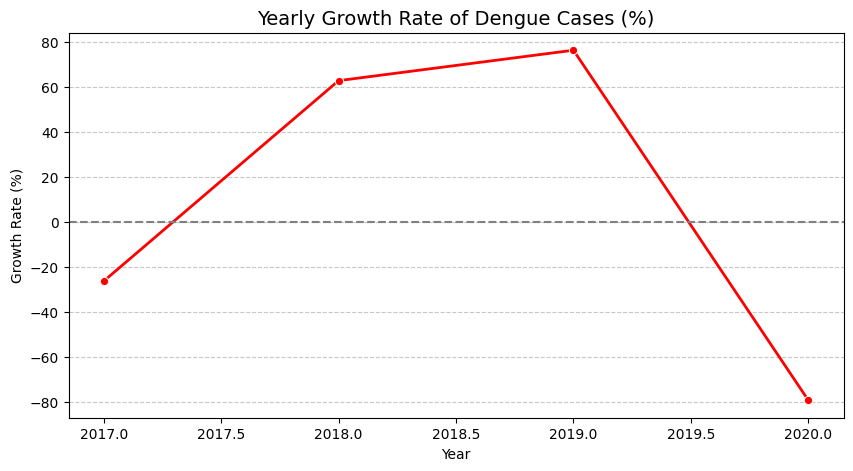

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_data.index, y=yearly_data["Cases_Growth_Rate"], marker="o", color="red", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="--")
plt.title("Yearly Growth Rate of Dengue Cases (%)", fontsize=14)
plt.ylabel("Growth Rate (%)")
plt.xlabel("Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<h2> Insight 2 </h2>

<h3> From 2017 to 2018, dengue cases saw a sharp increase, with the growth rate exceeding 60%, likely due to environmental factors, increased mosquito breeding, or inadequate control measures. The upward trend continued into 2019, reaching the peak growth rate in the dataset, suggesting a major outbreak driven by favorable conditions for transmission or lapses in preventive efforts. However, 2019 to 2020 marked a dramatic decline of nearly -80%, indicating the success of interventions, environmental shifts, or external factors. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 3. How has the dengue death rate changed over the years?

In [14]:
# Calculate yearly death rate (Deaths / Cases * 100)
yearly_data["Death_Rate"] = (yearly_data["Dengue_Deaths"] / yearly_data["Dengue_Cases"]) * 100
yearly_data

,Dengue_Cases,Dengue_Deaths,Cases_Growth_Rate,Death_Rate
Year,,,,
2016,209544,8127,NaN,3.878422
2017,154155,4563,-26.433112,2.960008
2018,250783,1226,62.682365,0.488869
2019,441902,1733,76.208914,0.392168
2020,91041,1195,-79.397921,1.312595


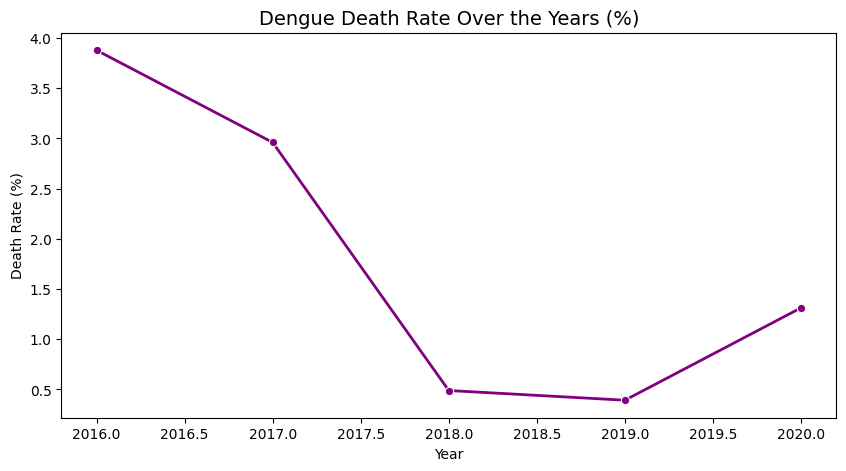

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_data.index, y=yearly_data["Death_Rate"], marker="o", color="purple", linewidth=2)
plt.title("Dengue Death Rate Over the Years (%)", fontsize=14)
plt.ylabel("Death Rate (%)")
plt.xlabel("Year")
plt.show()

<h2> Insight 3 </h2>

<h3> The dengue death rate saw a sharp decline from 2016 to 2018, likely due to better medical interventions and early detection efforts. It remained low in 2018 and 2019, indicating effective disease management. However, 2020 showed an uptick in deaths, possibly due to healthcare disruptions or a more severe strain.  </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 4. Which year had the highest number of dengue cases and deaths?

In [16]:
# Find the year with max cases and deaths
max_cases_year = yearly_data["Dengue_Cases"].idxmax()
max_deaths_year = yearly_data["Dengue_Deaths"].idxmax()
print(f"The year that has the highest dengue cases is the year: {max_cases_year}")
print(f"The year that has the highest dengue death is the year: {max_deaths_year}")

The year that has the highest dengue cases is the year: 2019
The year that has the highest dengue death is the year: 2016


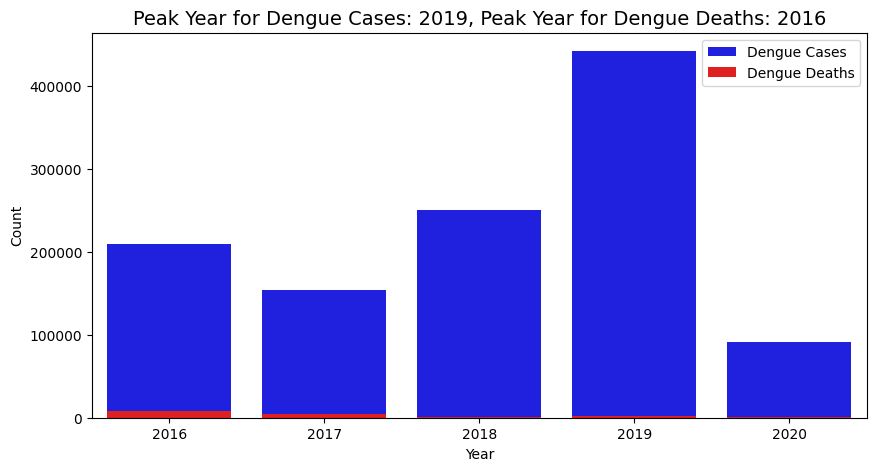

In [17]:

# Highlight the peak years
plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_data.index, y=yearly_data["Dengue_Cases"], color="blue", label="Dengue Cases")
sns.barplot(x=yearly_data.index, y=yearly_data["Dengue_Deaths"], color="red", label="Dengue Deaths")
plt.title(f"Peak Year for Dengue Cases: {max_cases_year}, Peak Year for Dengue Deaths: {max_deaths_year}", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend()
plt.show()


<h2> Insight 4 </h2>

<h3> 2019 recorded the highest number of dengue cases, indicating a major outbreak that year, possibly due to favorable conditions for mosquito breeding or increased transmission rates. On the other hand, 2016 had the highest dengue deaths, suggesting limited medical resources or less effective treatment strategies at the time. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 5. Does the year with the highest cases also have the highest deaths?

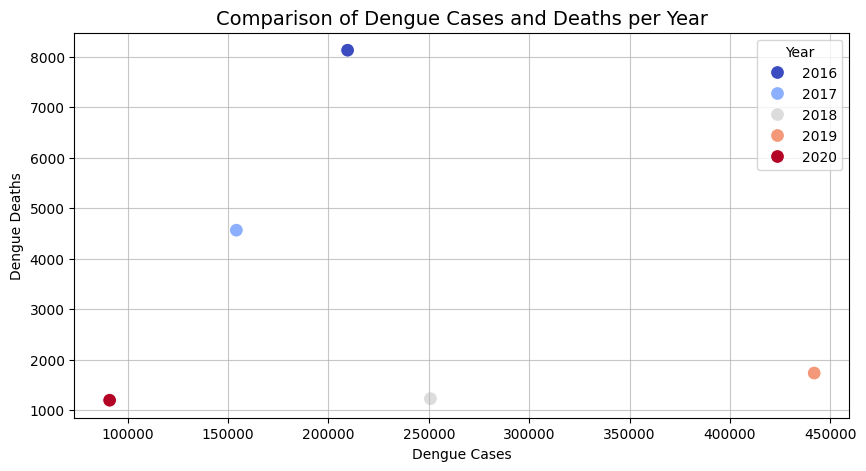

In [18]:
# Scatter plot to compare yearly cases and deaths
plt.figure(figsize=(10, 5))
sns.scatterplot(x=yearly_data["Dengue_Cases"], y=yearly_data["Dengue_Deaths"], hue=yearly_data.index, palette="coolwarm", s=100)
plt.title("Comparison of Dengue Cases and Deaths per Year", fontsize=14)
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid(alpha=0.7)
plt.show()

<h2> Insight 5 </h2>

<h3> The scatter plot shows that higher dengue cases don’t always lead to higher deaths. 2016 had fewer cases but the highest deaths, suggesting weaker medical interventions at the time. In contrast, 2019 had the most cases but relatively lower deaths </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> Monthly & Seasonal Trends

<h2> 6. How do dengue cases vary by month across all years?

In [19]:
# Group data by Month
monthly_data = dengue.groupby("Month")[["Dengue_Cases"]].sum()
monthly_data

,Dengue_Cases
Month,
April,32508
August,187554
December,88431
February,77801
January,84328
July,138242
June,58110
March,57576
May,32387


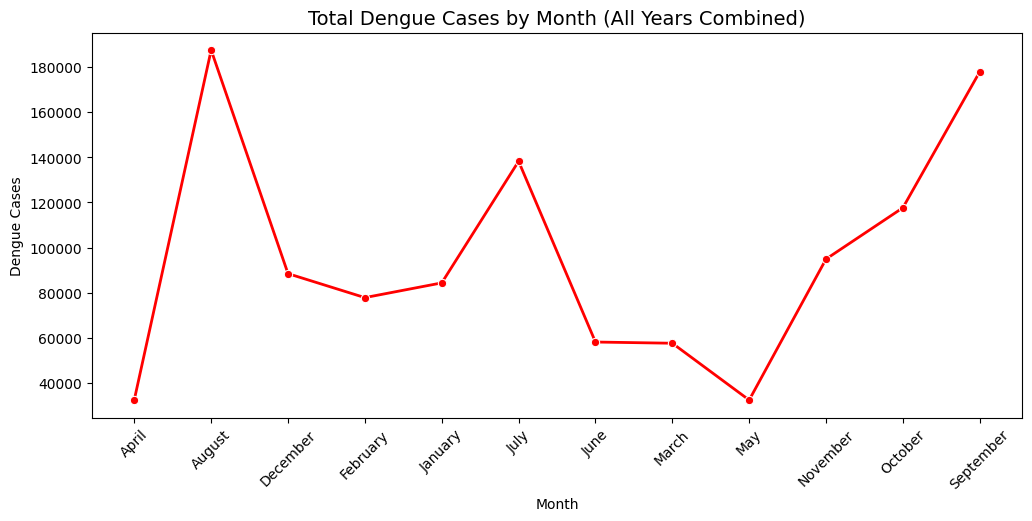

In [20]:

# Plot monthly cases
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_data.index, y=monthly_data["Dengue_Cases"], marker="o", color="red", linewidth=2)
plt.title("Total Dengue Cases by Month (All Years Combined)", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


<h2> Insight 6 </h2>

<h3> Dengue cases fluctuate throughout the year, peaking in August and September, likely due to increased mosquito activity during the rainy season. Cases decline towards December but remain relatively high before dropping further in May, which records the lowest cases. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 7. Which months have the highest and lowest dengue cases?

In [21]:
# Find the peak and lowest months
peak_month = monthly_data["Dengue_Cases"].idxmax()
low_month = monthly_data["Dengue_Cases"].idxmin()
print(f"The month that has the highest dengue cases is the month: {peak_month}")
print(f"The month that has the lowest dengue cases is the month: {low_month}")

The month that has the highest dengue cases is the month: August
The month that has the lowest dengue cases is the month: May


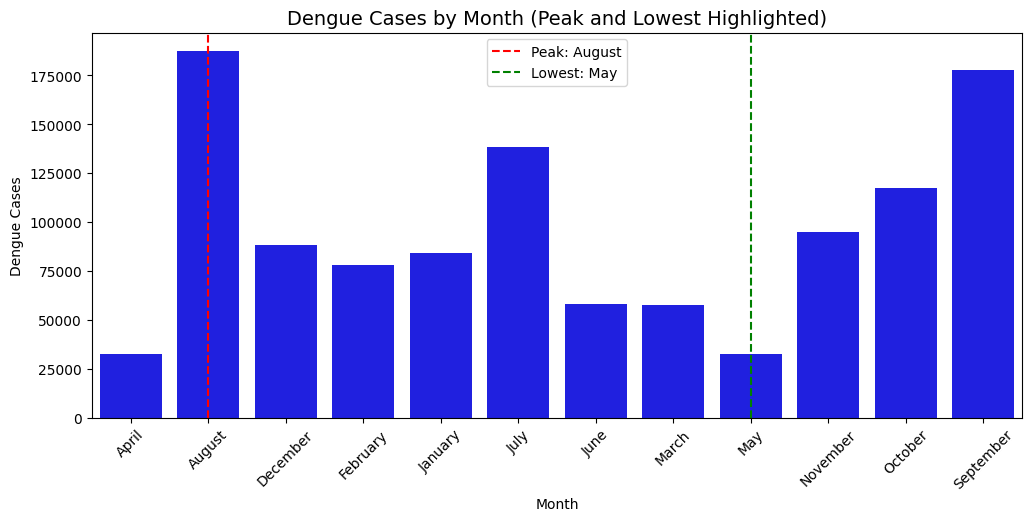

In [22]:

# Highlight peak and low months
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_data.index, y=monthly_data["Dengue_Cases"], color="blue")
plt.axvline(x=peak_month, color="red", linestyle="--", label=f"Peak: {peak_month}")
plt.axvline(x=low_month, color="green", linestyle="--", label=f"Lowest: {low_month}")
plt.title("Dengue Cases by Month (Peak and Lowest Highlighted)", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend()
plt.show()


<h2> Insight 7 </h2>

<h3> Dengue cases show a clear seasonal pattern, peaking in August with around 185,000 cases, while May records the lowest at approximately 32,000. The burden remains high in September (175,000) and July (135,000), highlighting a peak transmission period in late summer. In contrast, spring sees a significant decline, suggesting seasonal factors play a major role in dengue outbreaks. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 8. How do monthly trends compare across different years?

In [23]:
# Group by Month and Year
monthly_trends = dengue.groupby(["Year", "Month"])[["Dengue_Cases"]].sum().reset_index()
monthly_trends

,Year,Month,Dengue_Cases
0,2016,April,7269
1,2016,August,36195
2,2016,December,13490
3,2016,February,12386
4,2016,January,17052
5,2016,July,29744
6,2016,June,10831
7,2016,March,9300
8,2016,May,8092
9,2016,November,16252


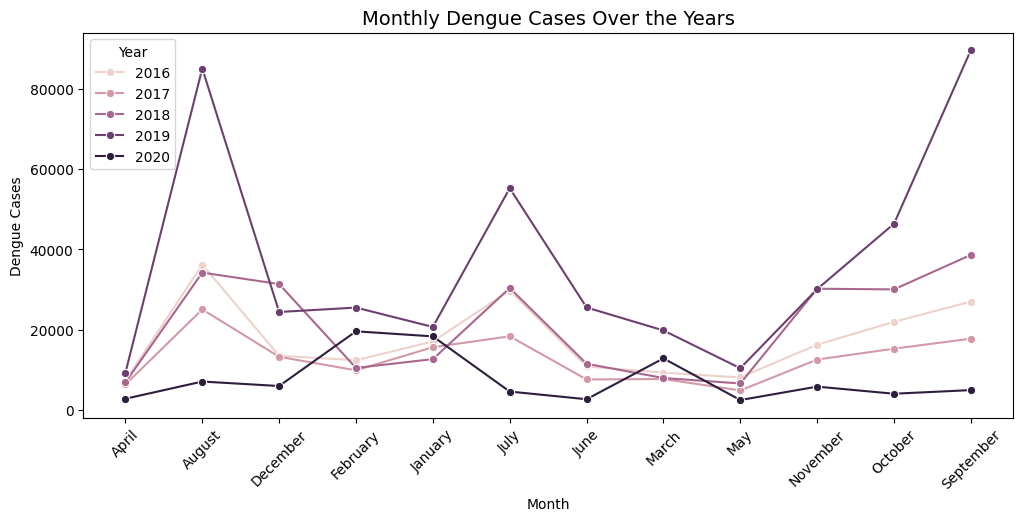

In [24]:
# Plot monthly cases per year
plt.figure(figsize=(12, 5))
sns.lineplot(x="Month", y="Dengue_Cases", hue="Year", data=monthly_trends, marker="o")
plt.title("Monthly Dengue Cases Over the Years", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()


<h2> Insight 8 </h2>

<h3> Monthly dengue cases follow a consistent seasonal trend, with August and September showing the highest numbers across multiple years. 2018 had the most extreme fluctuations, peaking at around 85,000 cases in both months, while 2020 remained low throughout the year, rarely exceeding 10,000 cases per month. 2016 and 2017 showed moderate variations, whereas 2019 had a unique mid-year spike in July (55,000 cases), which wasn’t observed in other years. Despite yearly differences, most years see lower cases in April-May, with seasonal intensity varying by year. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 9. Is there a clear dengue season (e.g., rainy vs. dry months)?

In [25]:
# Define Seasons (Adjust based on region)
dengue["Season"] = dengue["Month"].map({
    "January": "Dry", "February": "Dry", "March": "Dry",
    "April": "Transition", "May": "Rainy", "June": "Rainy",
    "July": "Rainy", "August": "Rainy", "September": "Rainy",
    "October": "Transition", "November": "Dry", "December": "Dry"
})


# Group by Season
seasonal_data = dengue.groupby("Season")[["Dengue_Cases"]].sum()
seasonal_data

,Dengue_Cases
Season,
Dry,403036
Rainy,594236
Transition,150153


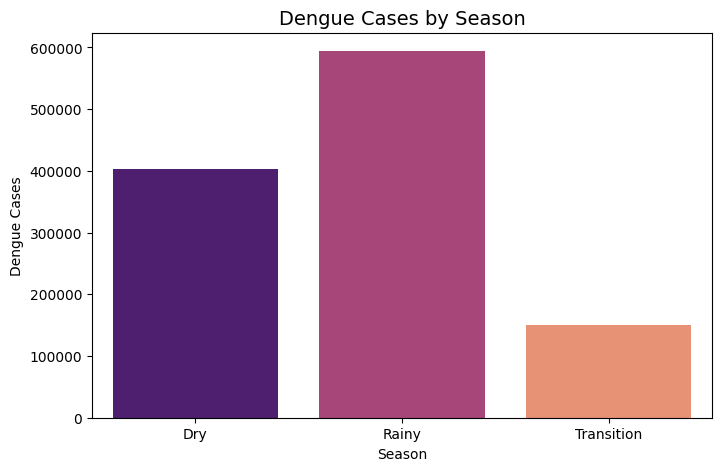

In [26]:
# Plot seasonal trend
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_data.index, y=seasonal_data["Dengue_Cases"], palette="magma")
plt.title("Dengue Cases by Season", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Season")
plt.show()


<h2> Insight 9 </h2>

<h3> Dengue cases follow a clear seasonal pattern, with the rainy season experiencing the highest burden at around 600,000 cases nearly 1.5 times more than the dry season’s 400,000. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 10. How do dengue deaths compare across different seasons?

In [27]:
# Group by Season for deaths
seasonal_deaths = dengue.groupby("Season")[["Dengue_Deaths"]].sum()
seasonal_deaths

,Dengue_Deaths
Season,
Dry,2017
Rainy,7957
Transition,6870


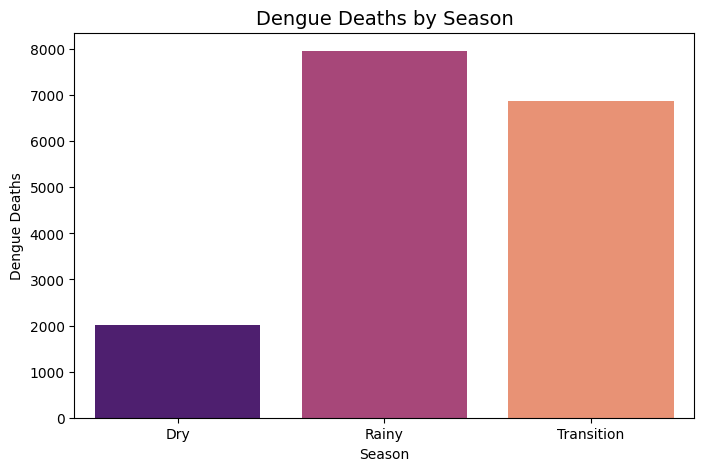

In [28]:
# Plot seasonal deaths
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_deaths.index, y=seasonal_deaths["Dengue_Deaths"], palette="magma")
plt.title("Dengue Deaths by Season", fontsize=14)
plt.ylabel("Dengue Deaths")
plt.xlabel("Season")
plt.show()


<h2> Insight 10 </h2>

<h3> Dengue deaths follow a distinct seasonal pattern, with the rainy season recording around 8,000 deaths, which is four times higher than the dry season’s 2,000. However, a surprising trend emerges in the transition period, which sees nearly 7,000 deaths despite significantly fewer cases. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h1> Regional Analysis

<h2> 11. Which regions have the highest and lowest total dengue cases?

In [29]:
# Group data by Region
regional_data = dengue.groupby("Region")[["Dengue_Cases"]].sum().sort_values(by="Dengue_Cases", ascending=False)
regional_data

,Dengue_Cases
Region,
Region IV-A,163029
Region III,131064
Region VI,117523
NCR,115966
Region VII,110683
Region X,82437
Region XII,59802
Region I,59066
Region VIII,51983


In [30]:
high_region_cases = regional_data["Dengue_Cases"].idxmax()
low_region_cases = regional_data["Dengue_Cases"].idxmin()
print(f"The region that has the highest dengue cases is {high_region_cases}")
print(f"The region that has the lowest dengue cases is {low_region_cases}")

The region that has the highest dengue cases is Region IV-A
The region that has the lowest dengue cases is BARMM


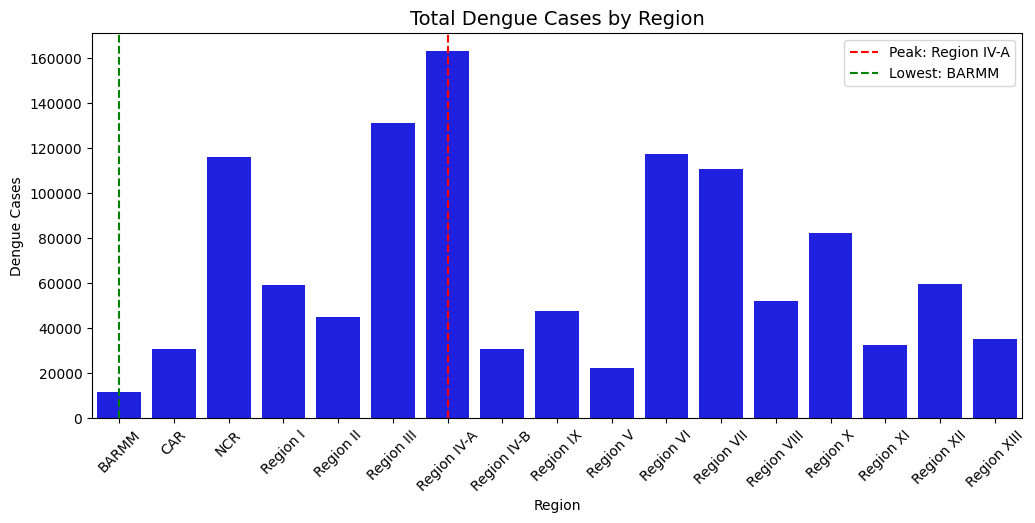

In [31]:
# Group data by Region
regional_data = dengue.groupby("Region")[["Dengue_Cases"]].sum().sort_values(by="Dengue_Cases", ascending=False)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=regional_data.index, y=regional_data["Dengue_Cases"], color="blue")
plt.title("Total Dengue Cases by Region", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Region")
plt.axvline(x=high_region_cases, color="red", linestyle="--", label=f"Peak: {high_region_cases}")
plt.axvline(x=low_region_cases, color="green", linestyle="--", label=f"Lowest: {low_region_cases}")
plt.xticks(rotation=45)
plt.legend()
plt.show()


<h2> Insight 11 </h2>

<h3> Region VI-A reports the highest dengue burden with approximately 180,000 cases, while BARMM has the lowest at around 20,000. Several regions, including Region VI, Region IV-A, Region VII, and Region X, exceed 100,000 cases, whereas others, like Region IX, Region XII, and CAR, remain below 40,000. This significant geographic disparity suggests that regional environmental, demographic, and healthcare factors play a crucial role in dengue transmission and reporting. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 12. How do dengue deaths vary by region?

In [32]:
# Group data by Region for deaths
regional_deaths = dengue.groupby("Region")[["Dengue_Deaths"]].sum().sort_values(by="Dengue_Deaths", ascending=False)
regional_deaths

,Dengue_Deaths
Region,
NCR,4008
Region XII,2796
Region VI,1825
Region VII,1760
CAR,1008
Region XIII,966
Region X,848
Region IV-A,652
Region VIII,585


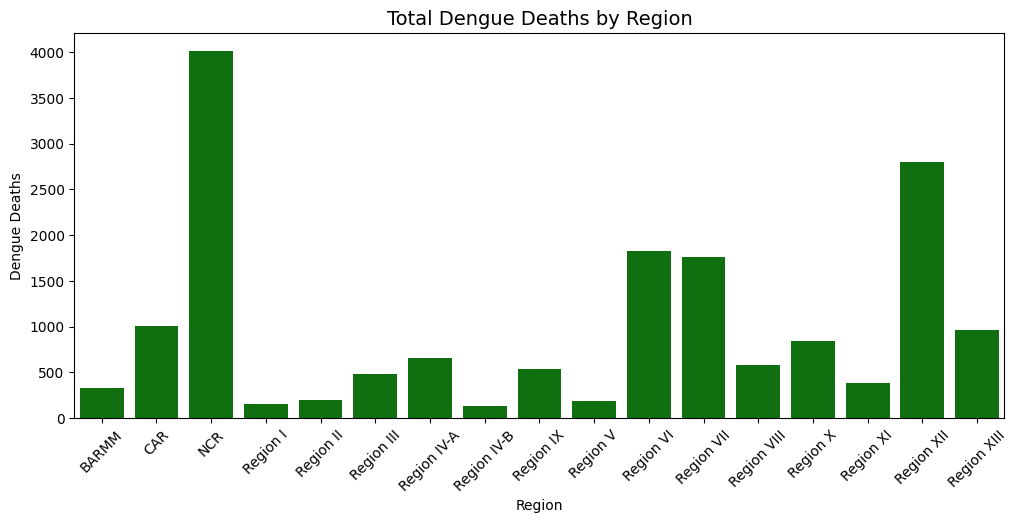

In [33]:
plt.figure(figsize=(12, 5))
sns.barplot(x=regional_deaths.index, y=regional_deaths["Dengue_Deaths"], color='green')
plt.title("Total Dengue Deaths by Region", fontsize=14)
plt.ylabel("Dengue Deaths")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


<h2> Insight 12 </h2>

<h3> NCR records the highest dengue mortality at around 4,000 deaths, followed by Region XII with approximately 2,800. On the other hand, Region VIII and Region IV-B report the lowest fatalities, each with fewer than 200 deaths. Interestingly, the mortality pattern does not directly align with case distribution, as NCR has a disproportionately high death toll despite moderate case numbers. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 13. How do dengue cases vary across regions over the years?

In [34]:
# Group by Region and Year
regional_trends = dengue.groupby(["Year", "Region"])[["Dengue_Cases"]].sum().reset_index()
regional_trends

,Year,Region,Dengue_Cases
0,2016,BARMM,2191
1,2016,CAR,9164
2,2016,NCR,13002
3,2016,Region I,8281
4,2016,Region II,3891
...,...,...,...
80,2020,Region VIII,4832
81,2020,Region X,6225
82,2020,Region XI,1936
83,2020,Region XII,4363


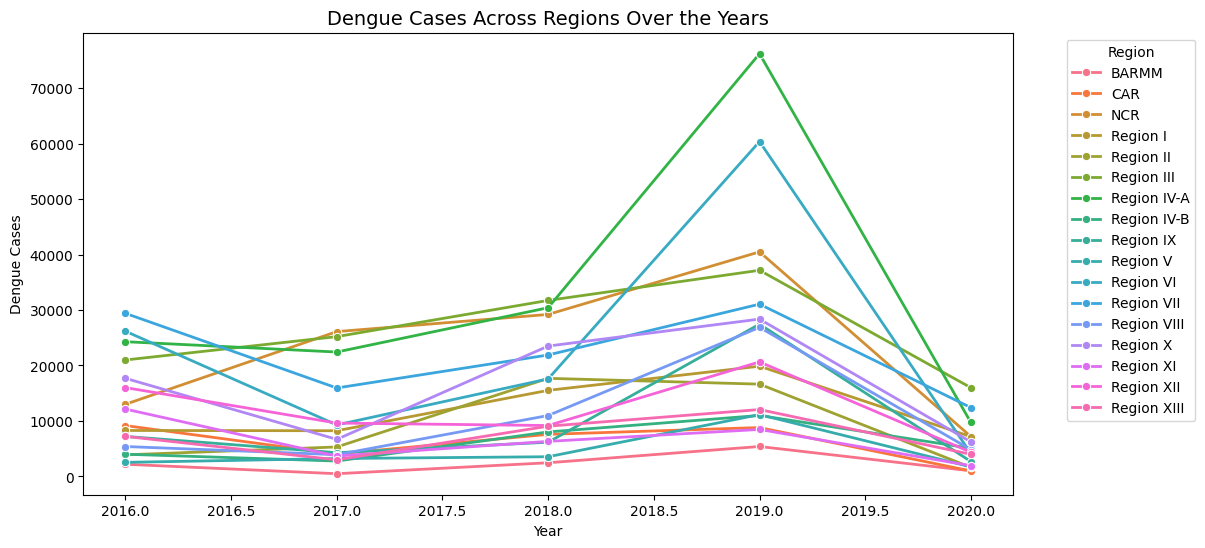

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Dengue_Cases", hue="Region", data=regional_trends, marker="o", linewidth=2)
plt.title("Dengue Cases Across Regions Over the Years", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Year")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<h2> Insight 13 </h2>

<h3> Dengue cases have shown substantial regional variations from 2016 to 2020, with Region VI-A experiencing the most dramatic fluctuations. A major epidemic spike in 2019 pushed its cases beyond 70,000, followed by Region X with approximately 60,000. Most regions followed a similar trend stable case counts from 2016 to 2018, a sharp increase in 2019, and a significant decline in 2020. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 14. Are there regional differences in seasonal dengue trends?

In [36]:
# Group by Region and Season
regional_seasonal = dengue.groupby(["Region", "Season"])[["Dengue_Cases"]].sum().reset_index()
regional_seasonal

,Region,Season,Dengue_Cases
0,BARMM,Dry,3725
1,BARMM,Rainy,6439
2,BARMM,Transition,1373
3,CAR,Dry,7857
4,CAR,Rainy,19244
5,CAR,Transition,3481
6,NCR,Dry,45463
7,NCR,Rainy,51517
8,NCR,Transition,18986
9,Region I,Dry,16813


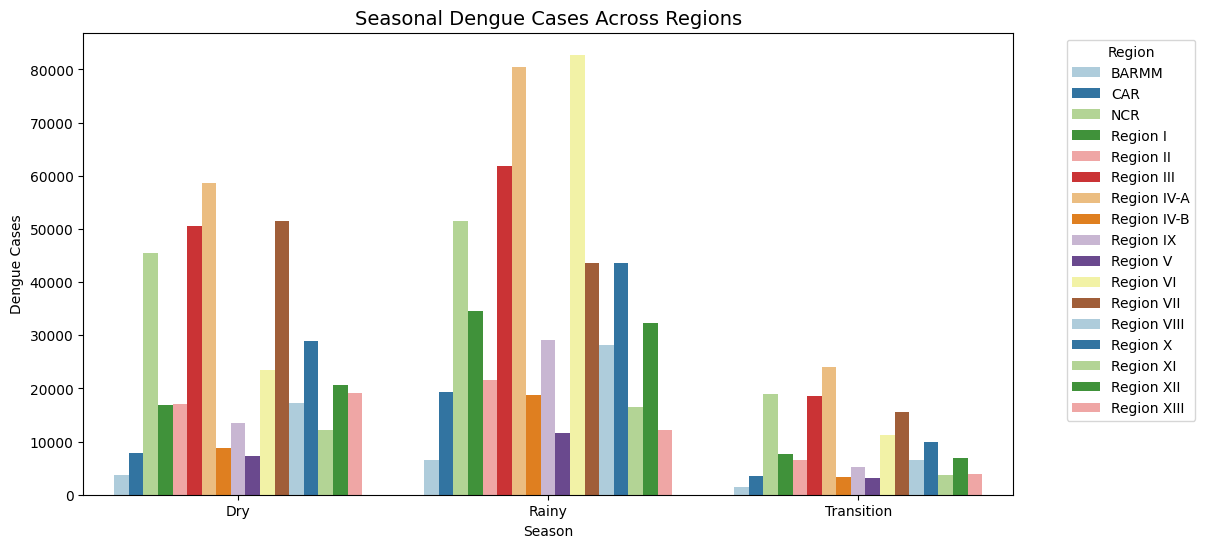

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Season", y="Dengue_Cases", hue="Region", data=regional_seasonal, palette="Paired")
plt.title("Seasonal Dengue Cases Across Regions", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Season")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<h2> Insight 14 </h2>

<h3> Dengue cases follow distinct seasonal trends across regions, with Region X experiencing the highest rainy-season burden (around 80,000 cases) and Region III leading in the dry season (about 60,000 cases). While most regions see higher cases during the rainy season, Region III, Region VII, and CAR report more cases in the dry season, suggesting unique local transmission dynamics. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 15. Are high-case regions also high-fatality regions?

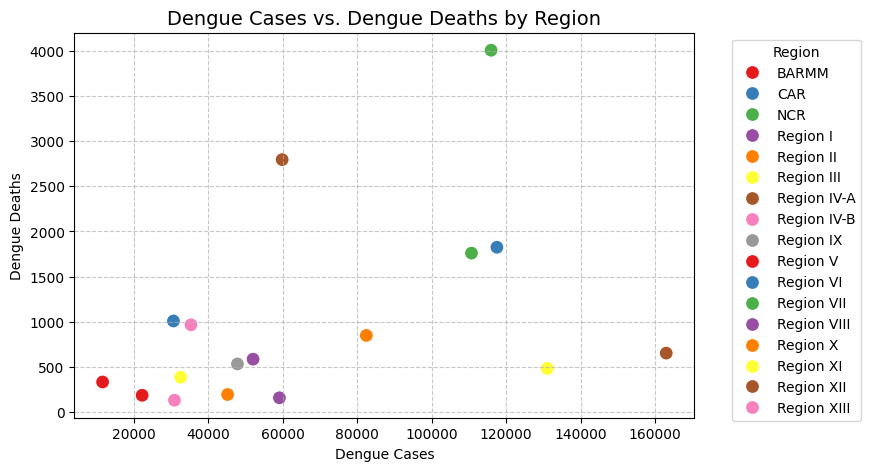

In [38]:
# Merge dengue cases and deaths for regions
regional_comparison = dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum()

# Scatter plot for comparison
plt.figure(figsize=(8, 5))
sns.scatterplot(x=regional_comparison["Dengue_Cases"], y=regional_comparison["Dengue_Deaths"], hue=regional_comparison.index, palette="Set1", s=100)
plt.title("Dengue Cases vs. Dengue Deaths by Region", fontsize=14)
plt.ylabel("Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<h2> Insight 15 </h2>

<h3> High dengue case numbers do not always correlate with high fatality rates across regions. Region VIII reports the highest death toll at around 4,000 despite not having the most cases, while Region IV-A also shows disproportionately high mortality with moderate case numbers. In contrast, Region III records relatively low deaths despite having one of the highest case counts. These disparities suggest that factors beyond case numbers—such as healthcare quality, treatment access. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 16. Were there any extreme dengue outbreaks in a specific year?

In [39]:
# Group by Year
yearly_cases = dengue.groupby("Year")[["Dengue_Cases"]].sum()
yearly_cases

,Dengue_Cases
Year,
2016,209544
2017,154155
2018,250783
2019,441902
2020,91041


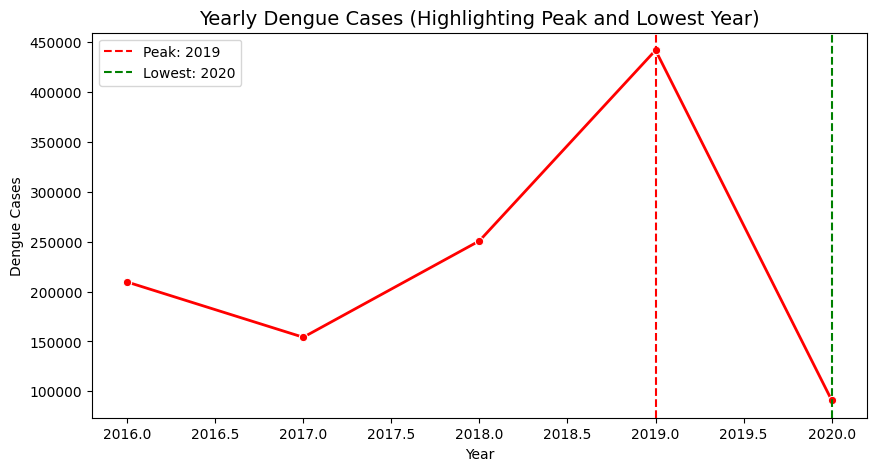

In [40]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_cases.index, y=yearly_cases["Dengue_Cases"], marker="o", linewidth=2, color="red")

# Highlight highest and lowest outbreak years
peak_year = yearly_cases["Dengue_Cases"].idxmax()
low_year = yearly_cases["Dengue_Cases"].idxmin()
plt.axvline(x=peak_year, color="red", linestyle="--", label=f"Peak: {peak_year}")
plt.axvline(x=low_year, color="green", linestyle="--", label=f"Lowest: {low_year}")

# Labels & Legend
plt.title("Yearly Dengue Cases (Highlighting Peak and Lowest Year)", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Year")
plt.legend()
plt.show()


<h2> Insight 16 </h2>

<h3> The data highlights a severe dengue outbreak in 2019, with cases surging to approximately 450,000, a dramatic rise from around 250,000 in 2018. This spike was followed by a sharp 82% decline in 2020, reaching the lowest recorded level of about 80,000 cases. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 17. Do dengue deaths follow the same yearly trend as cases?

In [41]:
# Group by Year for deaths
yearly_deaths = dengue.groupby("Year")[["Dengue_Deaths"]].sum()
yearly_deaths

,Dengue_Deaths
Year,
2016,8127
2017,4563
2018,1226
2019,1733
2020,1195


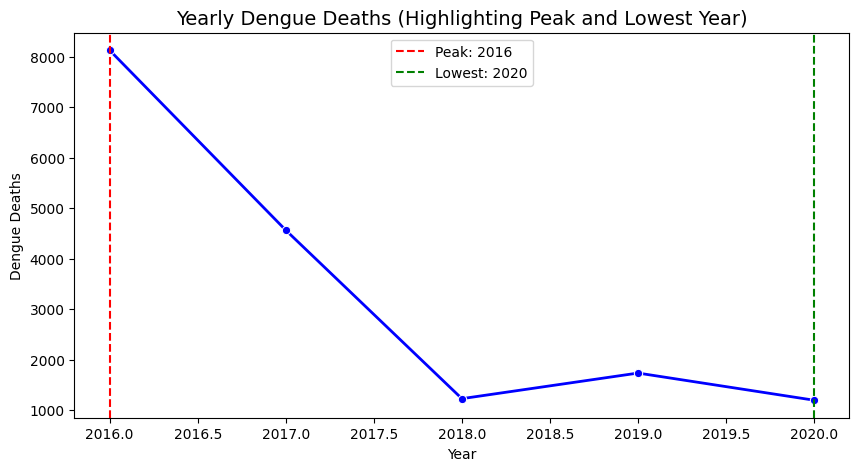

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_deaths.index, y=yearly_deaths["Dengue_Deaths"], marker="o", linewidth=2, color="blue")

# Highlight peak and low years
peak_year = yearly_deaths["Dengue_Deaths"].idxmax()
low_year = yearly_deaths["Dengue_Deaths"].idxmin()
plt.axvline(x=peak_year, color="red", linestyle="--", label=f"Peak: {peak_year}")
plt.axvline(x=low_year, color="green", linestyle="--", label=f"Lowest: {low_year}")

# Labels & Legend
plt.title("Yearly Dengue Deaths (Highlighting Peak and Lowest Year)", fontsize=14)
plt.ylabel("Dengue Deaths")
plt.xlabel("Year")
plt.legend()
plt.show()


<h2> Insight 17 </h2>

<h3> Dengue deaths follow a different trend than case counts. While cases peaked dramatically in 2019 at around 450,000, deaths were actually highest in 2016, reaching approximately 8,000. Despite the surge in infections, 2019 recorded only about 1,700 deaths, far lower than expected. Both metrics hit their lowest levels in 2020, but their diverging patterns suggest improvements in treatment, early intervention, or changes in virus virulence that helped reduce fatalities despite fluctuating infection rates. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 18. Is there an unusual spike in dengue cases in a specific month?

In [43]:
# Find the month with the highest and lowest cases
spike_month = monthly_data["Dengue_Cases"].idxmax()
print(f" The month the has the unusual spike is {peak_month}")

 The month the has the unusual spike is August


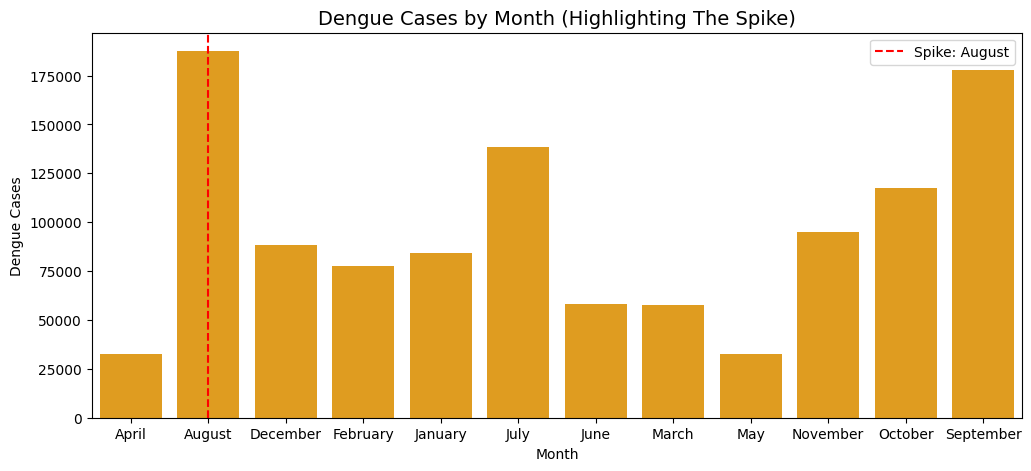

In [44]:
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_data.index, y=monthly_data["Dengue_Cases"], color='orange')

# Highlight peak and low months
plt.axvline(x=peak_month, color="red", linestyle="--", label=f"Spike: {peak_month}")

# Labels & Legend
plt.title("Dengue Cases by Month (Highlighting The Spike)", fontsize=14)
plt.ylabel("Dengue Cases")
plt.xlabel("Month")
plt.legend()
plt.show()


<h2> Insight 18 </h2>

<h3> Dengue cases show a clear and unusual spike in August, reaching approximately 175,000 cases nearly twice the typical monthly average. A secondary surge occurs in September (around 170,000 cases), while July also shows elevated numbers (about 135,000 cases). In contrast, the lowest transmission periods occur in April and May, with both months reporting fewer than 40,000 cases. This highlights a strong seasonal pattern, with dengue transmission peaking in mid-to-late monsoon months, likely due to increased mosquito breeding conditions. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 19. Were there any regions that had unexpected spikes or drops in dengue cases?

In [45]:
# Calculate the year-to-year change in cases for each region
region_year_change = dengue.groupby(["Region", "Year"])[["Dengue_Cases"]].sum().unstack().diff(axis=1)
region_year_change

Dengue_Cases                            
Year                2016   2017   2018   2019   2020
Region                                              
BARMM                NaN  -1706   1975   2933  -4385
CAR                  NaN  -5119   3539   1224  -7827
NCR                  NaN  13101   3097  11278 -33295
Region I             NaN    -45   7275   4356 -12696
Region II            NaN   1419  12368  -1044 -15006
Region III           NaN   4211   6526   5432 -21167
Region IV-A          NaN  -1861   7989  45785 -66474
Region IV-B          NaN  -1229   5249   2965  -5907
Region IX            NaN  -2941   1887  21286 -24763
Region V             NaN    693    323   7593  -9420
Region VI            NaN -16887   8299  42775 -56226
Region VII           NaN -13455   5949   9164 -18647
Region VIII          NaN  -1472   7060  15895 -22039
Region X             NaN -11001  16818   4859 -22131
Region XI            NaN  -8470   2649   2150  -6530
Region XII           NaN  -6400   -440  11467 -16277
Region XIII          NaN  -4227   6065   3001  -8071

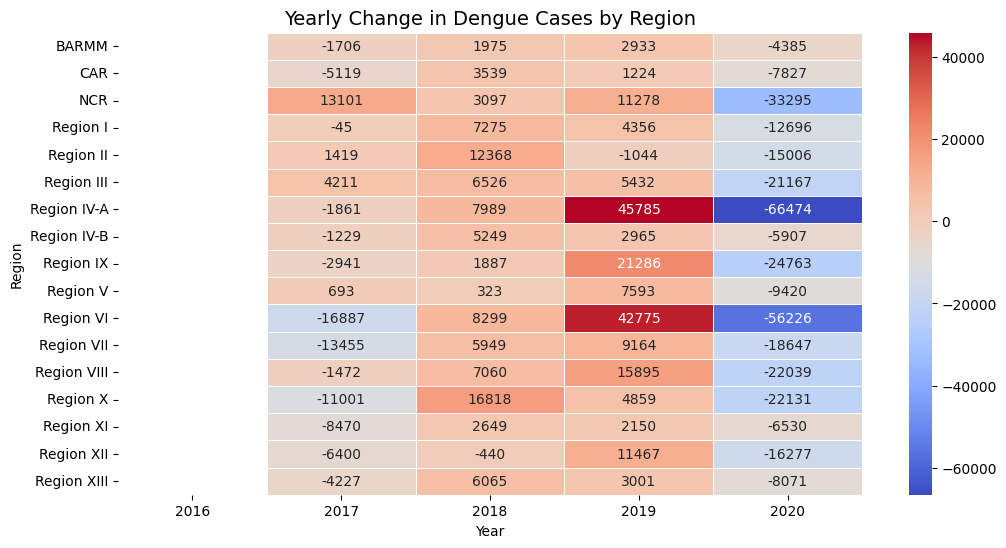

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(region_year_change["Dengue_Cases"], cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Yearly Change in Dengue Cases by Region", fontsize=14)
plt.ylabel("Region")
plt.xlabel("Year")
plt.show()

<h2> Insight 19 </h2>

<h3> Several regions experienced unexpected dengue case surges and declines. Region IV-A saw the most extreme spike in 2019, with an increase of 66,474 cases, while Region VI followed closely with a 47,775-case surge. Region VI then suffered a severe drop of 56,226 cases in 2020, and Region XI experienced the most drastic single-year decline (-65,530 cases in 2020). While most regions showed declining cases in 2020, Region VII had a reverse trend, increasing by 22,039 cases. </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">

<h2> 20. Are there any unusual case-to-death ratios across regions?

In [47]:
# Calculate case-to-death ratio
dengue["Case_Death_Ratio"] = dengue["Dengue_Cases"] / (dengue["Dengue_Deaths"] + 1)
ratio_data = dengue.groupby("Region")[["Case_Death_Ratio"]].mean().sort_values(by="Case_Death_Ratio", ascending=False)
ratio_data

,Case_Death_Ratio
Region,
Region III,310.539763
Region I,302.799384
Region IV-A,240.633301
Region X,232.338894
CAR,220.653059
Region XIII,197.806717
Region XII,192.952800
Region IV-B,188.355322
Region II,184.734947


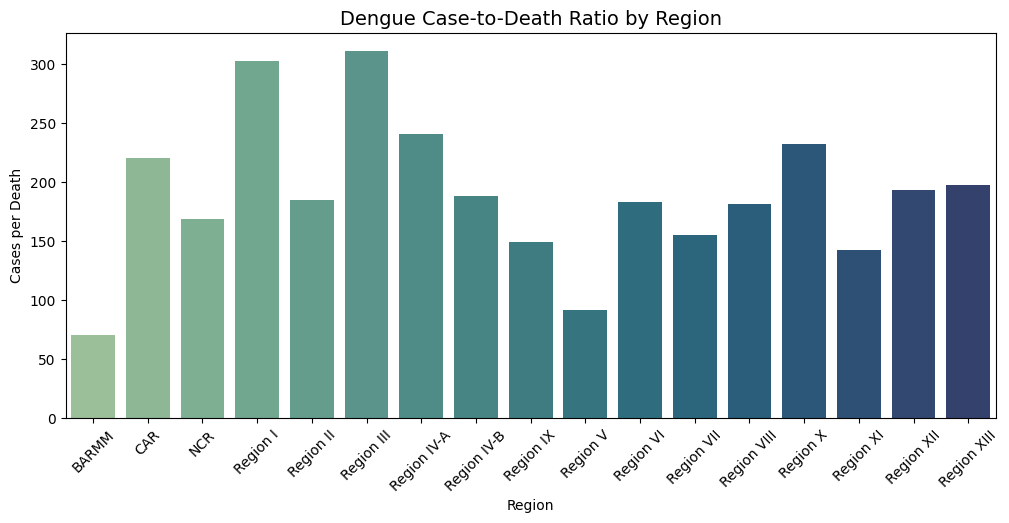

In [48]:
plt.figure(figsize=(12, 5))
sns.barplot(x=ratio_data.index, y=ratio_data["Case_Death_Ratio"], palette="crest")
plt.title("Dengue Case-to-Death Ratio by Region", fontsize=14)
plt.ylabel("Cases per Death")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


<h2> Insight 20 </h2>

<h3> Dengue mortality rates vary significantly by region, with Region X showing the most concerning ratio approximately 90 cases per death. This is far worse than Region VIII, which has the best survival rate with about 300 cases per death, over three times better than Region X. BARMM also reports a low ratio of around 70 cases per death, suggesting possible healthcare access or treatment quality challenges. The national average falls between 180 and 200 cases per death, with Regions I, VII, and NCR performing better than average, while Regions X, IX, and BARMM struggle.  </h3>

<hr style="border: 3px solid crimson; width: 90%; margin-left: auto; margin-right: auto; border-radius: 10px;">